In [55]:
%matplotlib inline

# Dependencies and Setup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import plotly.plotly as py
#import plotly.graph_objs as go
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter

In [56]:
# Load S&P file
sp1500 = "resources/S&P1500_Sector_All.csv"
sp1500 = pd.read_csv(sp1500) 

# Display the data table for preview
sp1500.head(2)

,Date,(INDEX) S&P Composite 1500 / Consumer Discretionary - SEC - Total Return,(INDEX) S&P Composite 1500 / Communication Services -SEC - Total Return,(INDEX) S&P Composite 1500 / Consumer Staples - SEC - Total Return,(INDEX) S&P Composite 1500 / Energy - SEC - Total Return,(INDEX) S&P Composite 1500 / Financials - SEC - Total Return,(INDEX) S&P Composite 1500 / Health Care - SEC - Total Return,(INDEX) S&P Composite 1500 / Industrials - SEC - Total Return,(INDEX) S&P Composite 1500 / Information Technology - SEC - Total Return,(INDEX) S&P Composite 1500 / Materials - SEC - Total Return,(INDEX) S&P Composite 1500 Real Estate - SEC - Total Return,(INDEX) S&P Composite 1500 / Utilities - SEC - Total Return
0,12/30/2013,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1,12/31/2013,0.37,-0.08,-0.03,0.92,0.34,0.0,0.43,0.71,0.26,-0.49,0.23


In [57]:
# Fix columns with slightly different formatting, to make all uniform (i.e., Communication Services and Real Estate cols)
sp1500.columns = sp1500.columns.str.replace('-SEC','- SEC').str.replace('1500 /','1500')

# Delete all special characters by replacing with empty string
sp1500.columns = sp1500.columns.str.replace(r'(','').str.replace(r')','')

# Remove remaining text we don't want
sp1500.columns = sp1500.columns.str.replace('INDEX S&P Composite 1500 ','').str.replace(' - SEC - Total Return ','')
sp1500.columns = sp1500.columns.str.replace('   ','') # replaces 3 back to back spaces left over after removing other text

# Replace space with underscore for ease of referencing column later on
sp1500.columns = sp1500.columns.str.replace(' ','_')

# Reformat date column, so we can filter on it later
sp1500['Date'] = pd.to_datetime(sp1500['Date'])

# Display the data table to see new column headers
sp1500.head(2)

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
0,2013-12-30,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1,2013-12-31,0.37,-0.08,-0.03,0.92,0.34,0.0,0.43,0.71,0.26,-0.49,0.23


In [58]:
#Pull my designated year of data (2017)
sp1500_2017 = sp1500[(sp1500['Date'] >= '6/1/2017') & (sp1500['Date'] <= '11/30/2017')]
sp1500_2017 = sp1500_2017.reset_index(drop=True)
sp1500_2017.head(2)

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
0,2017-06-01,42.20,21.58,45.03,-20.79,44.09,47.86,37.90,74.50,25.76,48.98,60.98
1,2017-06-02,42.74,21.54,45.52,-21.77,43.56,48.75,38.64,76.27,26.16,50.23,61.27


In [59]:
# Load Hurricane data
hurricane = "resources/Hurricane_data_all.csv"
hurricane = pd.read_csv(hurricane) 

# Reformat date columns, so we can use them later as part of formula
hurricane['Active_date'] = pd.to_datetime(hurricane['Active_date'])
hurricane['End_date'] = pd.to_datetime(hurricane['End_date'])

# Display the data table for preview
hurricane.head(10)

,Name,Year,Active_date,End_date,Days,Main_state,Highest_Category,Central_pressure,Max_wind,Damage_million,Direct_deaths
0,Arthur,2014,2014-07-01,2014-07-05,5,NC,2,973,85,17,1
1,Hermine,2016,2016-08-28,2016-09-03,7,FL,1,981,80,550,4
2,Matthew,2016,2016-09-28,2016-10-09,12,FL,5,934,165,"15,090",586
3,Harvey,2017,2017-08-17,2017-09-01,16,TX,4,937,130,"125,000",68
4,Irma,2017,2017-08-30,2017-09-12,14,FL,5,914,180,"64,760",52
5,Nate,2017,2017-10-04,2017-10-09,6,LA,1,981,90,787,46
6,Chris,2018,2018-07-06,2018-07-12,7,NC,2,969,105,0,1
7,Florence,2018,2018-08-31,2018-09-17,18,SC,4,939,140,"17,900",30
8,Michael,2018,2018-10-07,2018-10-12,6,FL,4,919,155,"14,600",60


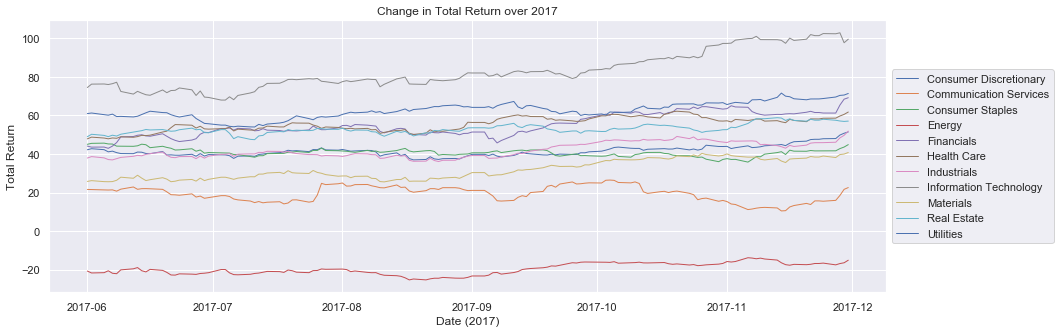

In [64]:
#2017 Hurricane Season by Sectors
plt.plot(sp1500_2017['Date'],sp1500_2017['Consumer_Discretionary'], linewidth = 1, label = 'Consumer Discretionary' )
plt.plot(sp1500_2017['Date'],sp1500_2017['Communication_Services'], linewidth = 1, label = 'Communication Services')
plt.plot(sp1500_2017['Date'],sp1500_2017['Consumer_Staples'], linewidth = 1, label = 'Consumer Staples')
plt.plot(sp1500_2017['Date'],sp1500_2017['Energy'], linewidth = 1, label = 'Energy')
plt.plot(sp1500_2017['Date'],sp1500_2017['Financials'], linewidth = 1, label = 'Financials')
plt.plot(sp1500_2017['Date'],sp1500_2017['Health_Care'], linewidth = 1, label = 'Health Care')
plt.plot(sp1500_2017['Date'],sp1500_2017['Industrials'], linewidth = 1, label = 'Industrials')
plt.plot(sp1500_2017['Date'],sp1500_2017['Information_Technology'], linewidth = 1, label = 'Information Technology')
plt.plot(sp1500_2017['Date'],sp1500_2017['Materials'], linewidth = 1, label = 'Materials')
plt.plot(sp1500_2017['Date'],sp1500_2017['Real_Estate'], linewidth = 1, label = 'Real Estate')
plt.plot(sp1500_2017['Date'],sp1500_2017['Utilities'], linewidth = 1, label = 'Utilities')

#my titles and labels:
plt.ylabel('Total Return')
plt.xlabel('Date (2017)')
plt.title('Change in Total Return over 2017')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

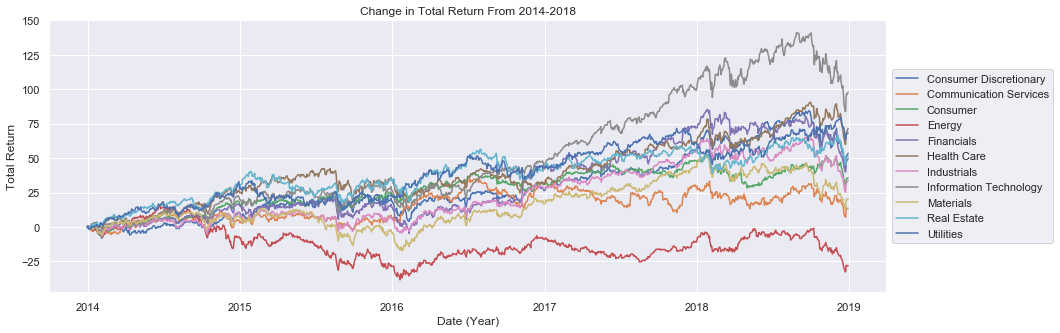

In [65]:
# make the line graph with date as the x axis, total return (industry name) as the y axis, add colors afterward

plt.plot(sp1500['Date'], sp1500['Consumer_Discretionary'], label = 'Consumer Discretionary')
plt.plot(sp1500['Date'], sp1500['Communication_Services'], label = 'Communication Services')
plt.plot(sp1500['Date'], sp1500['Consumer_Staples'], label = 'Consumer')
plt.plot(sp1500['Date'], sp1500['Energy'], label = 'Energy')
plt.plot(sp1500['Date'], sp1500['Financials'], label = 'Financials')
plt.plot(sp1500['Date'], sp1500['Health_Care'], label = 'Health Care')
plt.plot(sp1500['Date'], sp1500['Industrials'], label = 'Industrials')
plt.plot(sp1500['Date'], sp1500['Information_Technology'], label = 'Information Technology')
plt.plot(sp1500['Date'], sp1500['Materials'], label = 'Materials')
plt.plot(sp1500['Date'], sp1500['Real_Estate'], label = 'Real Estate')
plt.plot(sp1500['Date'], sp1500['Utilities'], label = 'Utilities')

plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (Year)')
plt.title('Change in Total Return From 2014-2018')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (10,7)
plt.show()

##############################################################################################################################

#2017 Hurricanes:
#Harvey - 2017-08-17	2017-09-01
#Irma - 2017-08-30	2017-09-12
#Nate - 2017-10-04	2017-10-09

#Plot entire 2017 season
#Plot each hurricane, with 21 days before and after.


# Harvey

In [66]:
#calculate 21 days before Active date and 21 days after End date to set as x-axis range

#change format from string to datetime objects 
hurricane['Active_date'] = pd.to_datetime(hurricane['Active_date'])
hurricane['End_date'] = pd.to_datetime(hurricane['End_date'])

hurricanes2= hurricane.set_index('Name')
start_date= hurricanes2.loc["Harvey", "Active_date"]
end_date= hurricanes2.loc["Harvey", "End_date"]

#set 3 week delta for x min and max
x_min= start_date - timedelta(days=21)
x_min = x_min.strftime('%m/%d/%Y')

x_max= end_date + timedelta(days=21)
x_max = x_max.strftime('%m/%d/%Y')

#plot for those dates for a chart called Harvey
hurricane_harvey = sp1500_2017[(sp1500_2017['Date']>= x_min)& (sp1500_2017['Date'] <= x_max)]

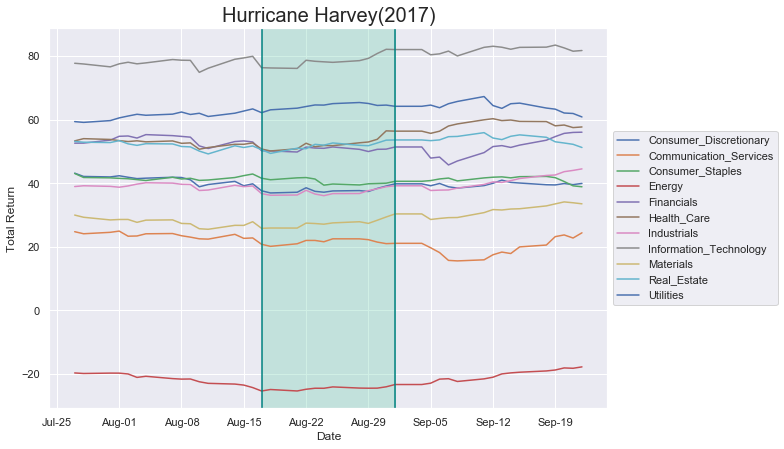

In [67]:
# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_harvey['Date'], hurricane_harvey.iloc[:,x])

    
# Shade area representing Hurricane Harvey 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date, color='teal')
plt.axvline(end_date, color='teal')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date, end_date, alpha=0.3, color='mediumaquamarine')

plt.ylabel('Total Return')
plt.xlabel('Date')
plt.title('Hurricane Harvey(2017)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (10,5)

#Finesse
sns.set()
plt.show()

# Irma

In [68]:
#calculate 21 days before Active date and 21 days after End date to set as x-axis range

#change format from string to datetime objects 
hurricane['Active_date'] = pd.to_datetime(hurricane['Active_date'])
hurricane['End_date'] = pd.to_datetime(hurricane['End_date'])

hurricanes3= hurricane.set_index('Name')
start_date= hurricanes3.loc["Irma", "Active_date"]
end_date= hurricanes3.loc["Irma", "End_date"]

#set 3 week delta for x min and max
x_min= start_date - timedelta(days=21)
x_min = x_min.strftime('%m/%d/%Y')

x_max= end_date + timedelta(days=21)
x_max = x_max.strftime('%m/%d/%Y')

#plot for those dates for a chart called Irma
hurricane_irma = sp1500_2017[(sp1500_2017['Date']>= x_min)& (sp1500_2017['Date'] <= x_max)]

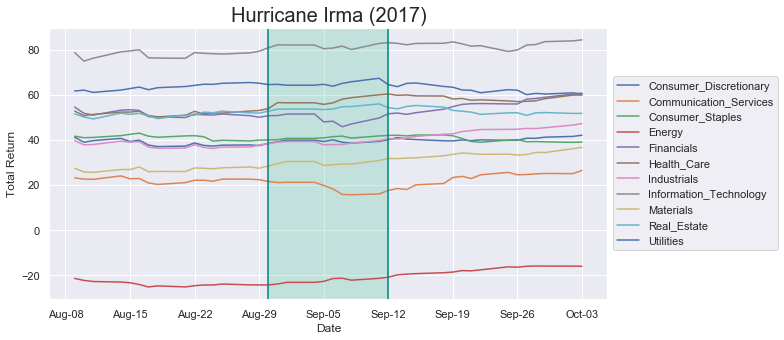

In [69]:
# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_irma['Date'], hurricane_irma.iloc[:,x])

    
# Shade area representing Hurricane Irma
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date, color='teal')
plt.axvline(end_date, color='teal')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date, end_date, alpha=0.3, color='mediumaquamarine')

plt.ylabel('Total Return')
plt.xlabel('Date')
plt.title('Hurricane Irma (2017)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

# Nate

In [70]:
#calculate 21 days before Active date and 21 days after End date to set as x-axis range

#change format from string to datetime objects 
hurricane['Active_date'] = pd.to_datetime(hurricane['Active_date'])
hurricane['End_date'] = pd.to_datetime(hurricane['End_date'])

hurricanes4= hurricane.set_index('Name')
start_date= hurricanes4.loc["Nate", "Active_date"]
end_date= hurricanes4.loc["Nate", "End_date"]

#set 3 week delta for x min and max
x_min= start_date - timedelta(days=21)
x_min = x_min.strftime('%m/%d/%Y')

x_max= end_date + timedelta(days=21)
x_max = x_max.strftime('%m/%d/%Y')

#plot for those dates for a chart called Irma
hurricane_nate = sp1500_2017[(sp1500_2017['Date']>= x_min)& (sp1500_2017['Date'] <= x_max)]

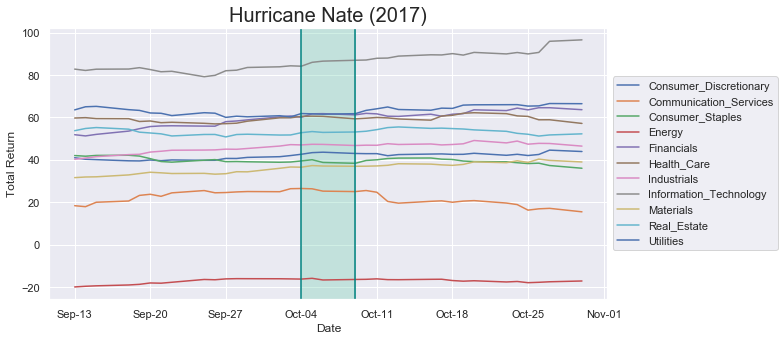

In [73]:
# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_nate['Date'], hurricane_nate.iloc[:,x])

    
# Shade area representing Hurricane Irma
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date, color='teal')
plt.axvline(end_date, color='teal')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date, end_date, alpha=0.3, color='mediumaquamarine')

plt.ylabel('Total Return')
plt.xlabel('Date')
plt.title('Hurricane Nate (2017)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()